# Preprocessing

## Introductory notes:
This notebook presents cleaning functionality:
* Resampling
* Bandpass and notch filtering
* Annotating bad channels 
* Annotating bad data spans
* Interpolating bad channels

Recommended reading:
1. [MNE: The Raw data structure](https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html)
2. [Learning eeg: artifacts](https://www.learningeeg.com/artifacts)
3. [MNE: Overview of artifact detection](https://mne.tools/stable/auto_tutorials/preprocessing/10_preprocessing_overview.html)
4. [MNE: Filtering and resampling data](https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html) 
5. [MNE: Handling bad channels](https://mne.tools/stable/auto_tutorials/preprocessing/15_handling_bad_channels.html)
6. [MNE: Annotating continuous data](https://mne.tools/stable/auto_tutorials/raw/30_annotate_raw.html)

## Import data

### Import module

In [2]:
from sleepeegpy.pipeline import CleaningPipe

### Initialize CleaningPipe object

In [3]:
pipe = CleaningPipe(
    # Can be any type of eeg files supported by the mne.read_raw() function.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\EL3001\EL3001_SLEEP.mff",
    # A directory you want the results to be saved in.
    output_dir=r"C:\Users\Gennadiy\Documents\data\EL3001",
)

Reading EGI MFF Header from C:\Users\Gennadiy\Documents\data\EL3001\EL3001_SLEEP.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...


## Resample

Resampling might be a long process (1+ hour), be patient. If you have enough RAM to load the signal, you may want to run `pipe.mne_raw.load_data()` before resampling. This will considerably speed up the process.

In [3]:
# pipe.mne_raw.load_data()
pipe.resample(
    sfreq=250,  # Desired new sampling frequency
    n_jobs=-1,  # The number of jobs to run in parallel. If -1, it is set to the number of CPU cores.
)

Reading 0 ... 8919090  =      0.000 ...  8919.090 secs...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:  2.0min finished


## Filter

### Band-pass

In [6]:
pipe.filter(
    l_freq=0.3, # Lower pass-band edge in Hz.
    h_freq=None, # Upper pass-band edge in Hz.
    n_jobs=-1
)

Reading 0 ... 5985607  =      0.000 ... 23942.428 secs...


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Filter length: 2751 samples (11.004 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:   32.7s finished


### Notch

In [7]:
pipe.notch(
    freqs="50s", # Remove 50 Hz and its harmonics.
    n_jobs=-1
)  

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:   28.2s finished


## Select bad channels & annotate bad epochs

Create average reference projection. You can apply and remove the projection from inside the plot. Does not have an effect on the raw signal itself if `projection=True`.

In [6]:
pipe.set_eeg_reference(ref_channels="average", projection=True)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


### Select bad channels

In [15]:
pipe.plot(
    save_bad_channels=True,  # Whether to save selected bad channels in a file
    save_annotations=False,  # Whether to save annotations in a file.
    # Whether to overwrite already saved bad_channels.txt or annotations.txt,
    # if set to False and there is already bad_channels.txt, new bad channels will be added to it.
    overwrite=False,
)

Channels marked as bad:
['E9', 'E10', 'E18', 'E35', 'E37', 'E64', 'E68', 'E69', 'E84', 'E91', 'E92', 'E157', 'E192', 'E200', 'E208', 'E209', 'E215', 'E216', 'E217', 'E219', 'E229', 'E244', 'E256']


If you want to continue with previously saved bad channels, use `pipe.read_bad_channels()`. The function will import the channels from the *bad_channels.txt* file.

In [13]:
pipe.read_bad_channels(
    # Path to the txt file with bad channel name per row.
    # If None, will try to import '{output_dir}/CleaningPipe/bad_channels.txt'
    path=None
)

### Interpolate bad channels

Interpolate bad channels using [spherical spline interpolation](https://mne.tools/stable/overview/implementation.html#bad-channel-repair-via-interpolation). Can be run from each analysis pipe.

In [9]:
pipe.interpolate_bads(
    reset_bads=True  # Whether to set interpolated channels back as normal.
)

Interpolating bad channels


    Automatic origin fit: head of radius 96.5 mm
Computing interpolation matrix from 234 sensor positions
Interpolating 23 sensors


Interpolated channels: ['E9', 'E10', 'E18', 'E35', 'E37', 'E64', 'E68', 'E69', 'E84', 'E91', 'E92', 'E157', 'E192', 'E200', 'E208', 'E209', 'E215', 'E216', 'E217', 'E219', 'E229', 'E244', 'E256']


### Select bad epochs

In [11]:
pipe.plot(
    save_bad_channels=False,  # Whether to save selected bad channels in a file
    save_annotations=True,  # Whether to save annotations in a file.
    # Whether to overwrite already saved bad_channels.txt or annotations.txt,
    # if set to False and there is already bad_channels.txt, new bad channels will be added to it.
    overwrite=False,
)

Channels marked as bad:
none


If you want to continue with previously saved annotations, use `pipe.read_annotations()`. The function will import the annotations from the *annotations.txt* file.

In [10]:
pipe.read_annotations(
    # Path to txt file with mne-style annotations.
    # If None, will try to import '{output_dir}/annotations.txt'
    path=None
)

c:\Users\Gennadiy\Documents\eeg-processing-pipeline\sleepeeg\pipeline.py:108: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  self.mne_raw.set_annotations(read_annotations(p))


In [10]:
pipe.plot()

Using qt as 2D backend.


Channels marked as bad:
none


## Save cleaned and annotated signal to the file

In [11]:
pipe.save_raw("cleaned_raw.fif", overwrite=True)

Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw.fif


Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw-1.fif
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw-2.fif
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw-3.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw-3.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw-2.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw.fif
[done]


## Additional functions

In [12]:
pipe.sf, pipe.bad_data_percent

(250.0, 4.84)

In [24]:
pipe.save_bad_channels()
pipe.save_annotations()

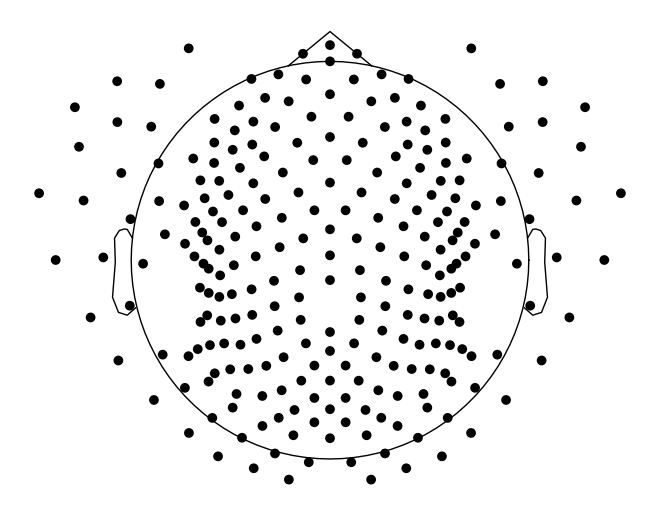

In [19]:
_ = pipe.plot_sensors()